In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.__version__

'2.10.0'

In [5]:
len(tf.config.list_physical_devices('GPU'))

1

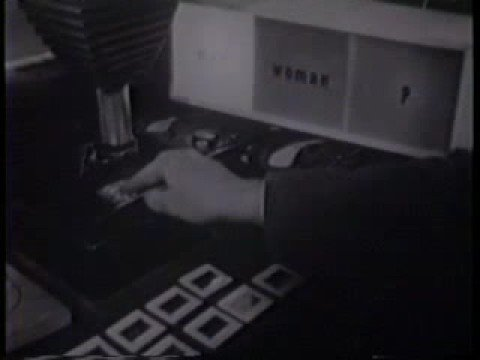

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

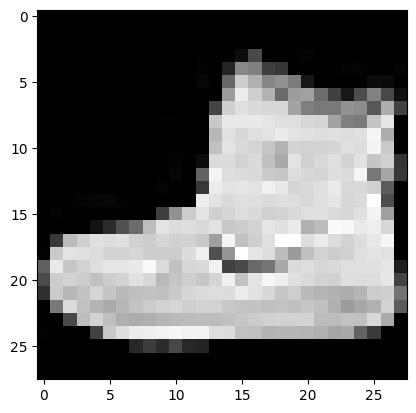

In [5]:
#x_train[0]
plt.figure()
plt.imshow(x_train[0], cmap='gray')

In [6]:
y_train[0]

9

In [7]:
y_train[data_idx]

NameError: name 'data_idx' is not defined

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
no_of_classes=y_train.max()+1

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(no_of_classes)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * no_of_classes
number_of_weights

7840

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    verbose=True,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 16.9190 - accuracy: 0.7463 - val_loss: 15.2122 - val_accuracy: 0.7598
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 11.8091 - accuracy: 0.7908 - val_loss: 13.1507 - val_accuracy: 0.7868
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 11.0985 - accuracy: 0.7951 - val_loss: 11.5339 - val_accuracy: 0.7934
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 11.4022 - accuracy: 0.7996 - val_loss: 13.8234 - val_accuracy: 0.7682
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 10.5881 - accuracy: 0.8017 - val_loss: 13.9304 - val_accuracy: 0.7686


In [13]:
model.predict(x_train[0:10])

1/1 [==============================] - 0s 96ms/step


array([[ -123.056435,  -411.39294 ,   -64.778404,  -184.9442  ,
         -272.39896 ,   367.52512 ,   -12.844068,   428.2602  ,
          170.13629 ,   816.5316  ],
       [  499.67163 ,  -183.48576 ,   361.446   ,   189.78812 ,
          -20.328827, -1236.2986  ,   359.75467 , -1521.8971  ,
          -29.710928,  -817.24646 ],
       [   79.35039 ,    62.688198,    84.560974,   129.81212 ,
           63.855713,  -451.58463 ,    86.20721 ,  -486.40457 ,
          -28.099688,  -299.2854  ],
       [  204.72107 ,   139.05315 ,   192.69818 ,   245.29944 ,
           84.17241 ,  -804.164   ,   201.65796 ,  -926.4867  ,
          -21.856337,  -677.8334  ],
       [  122.03262 ,   177.90814 ,   107.12793 ,   180.73962 ,
           65.45615 ,  -915.4605  ,    83.082   ,  -770.3711  ,
          -26.812632,  -801.74805 ],
       [  299.41647 ,   113.437416,   519.9837  ,   193.66724 ,
          236.87685 ,  -822.34564 ,   343.22302 , -1394.668   ,
           97.42772 , -1053.6344  ],
       [  

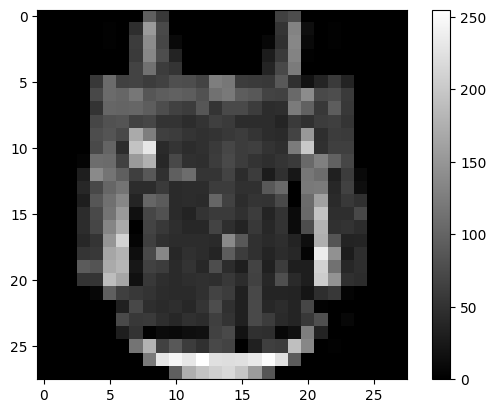

1/1 [==============================] - 0s 27ms/step


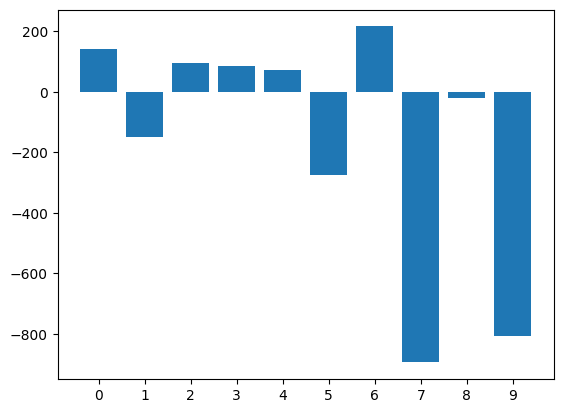

correct answer: 6


In [26]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(x_train[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(no_of_classes)
plt.figure()
plt.bar(x_values, model.predict(x_train[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", y_train[data_idx])

In [14]:
pred_0=model.predict(x_test[0])

1/1 [==============================] - 0s 78ms/step


In [15]:
np.argmax(pred_0)

9

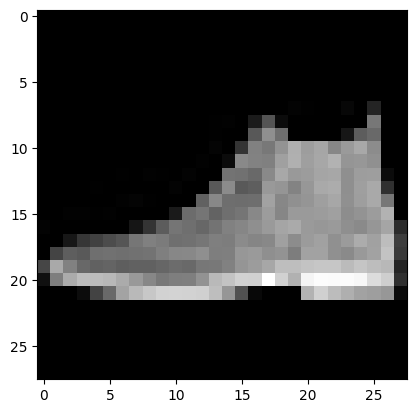

In [16]:
plt.figure()
plt.imshow(x_test[0], cmap='gray')

In [17]:
y_test[0]

9

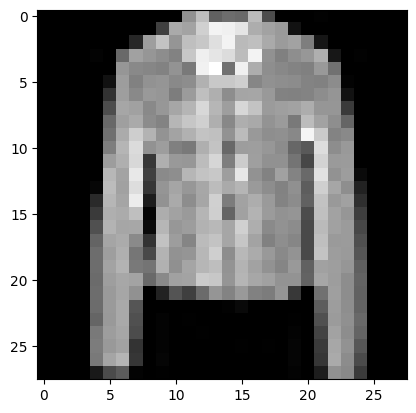

In [23]:
plt.figure()
plt.imshow(x_test[10], cmap='gray')

In [24]:
y_test[10]

4

In [18]:
model.predict(x_test[10])

1/1 [==============================] - 0s 31ms/step


array([[  158.08742 ,   142.83853 ,   289.47586 ,   165.27283 ,
          264.68857 ,  -585.33826 ,   265.0624  , -1179.9822  ,
           41.221596,  -777.75385 ]], dtype=float32)

In [12]:
# evaluating....
score=model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 10.3895 - accuracy: 0.8101
Test loss: 10.389466285705566
Test accuracy: 0.8101000189781189


In [13]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[ -186.60925 ,  -310.46875 ,   -61.556618, ...,   147.95396 ,
          130.42227 ,   275.70074 ],
       [  148.23679 ,  -240.02611 ,   297.45337 , ..., -1720.4022  ,
          108.74647 , -1257.5194  ],
       [  174.34248 ,   408.87155 ,    77.13401 , ...,  -773.57886 ,
           16.30954 ,  -579.84625 ],
       ...,
       [  141.23492 ,  -277.63046 ,    49.161724, ...,  -384.01904 ,
          168.44046 ,  -537.5911  ],
       [  104.00263 ,   441.98923 ,    89.02114 , ...,  -640.0967  ,
         -101.30398 ,  -128.82736 ],
       [ -124.91235 ,  -153.62914 ,   -39.37466 , ...,    68.0502  ,
           95.24137 ,   -48.990555]], dtype=float32)

In [15]:
y_pred.shape

(10000, 10)